In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv(r"D:\copied\dwsktop\MACHINE LEARNING\heartdataset.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


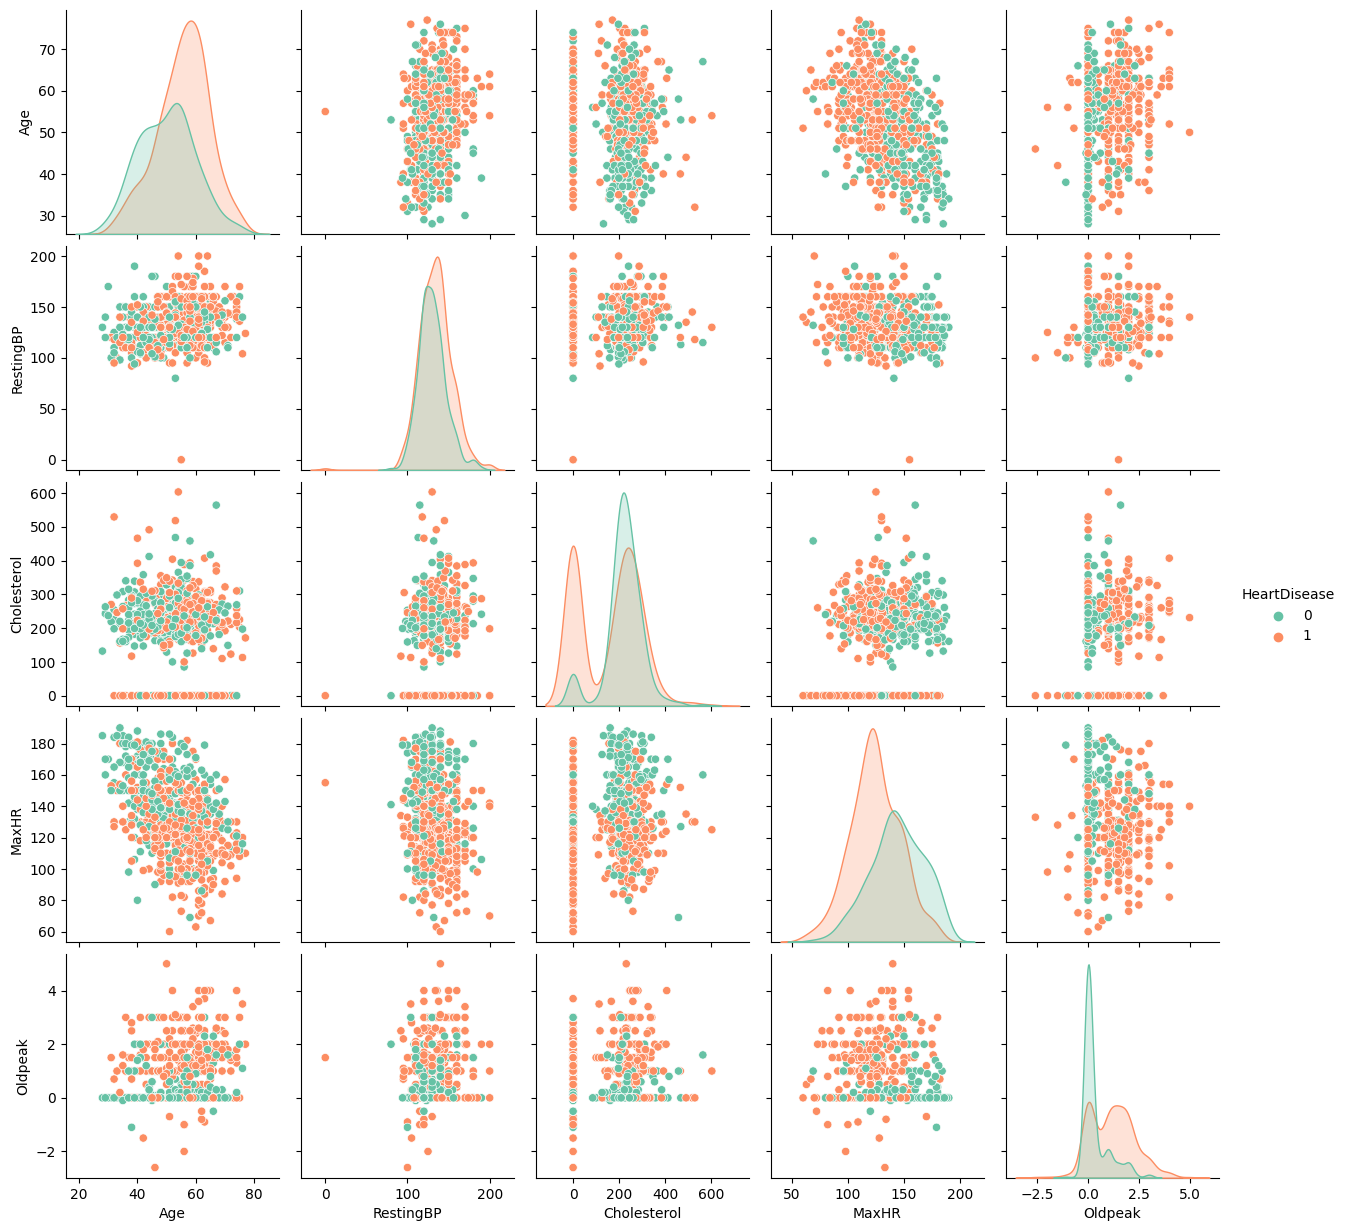

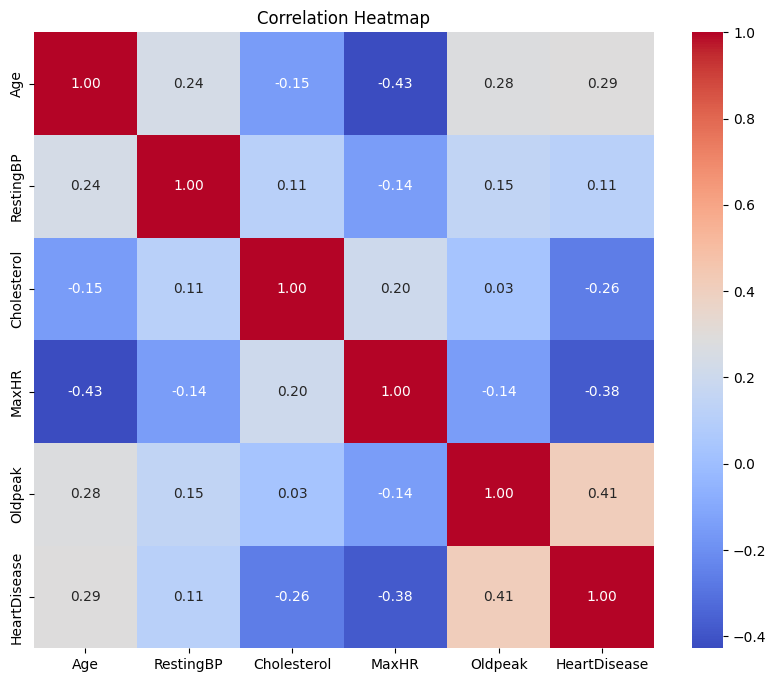

In [4]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

def numerical_eda(data, numerical_cols, target_col='HeartDisease'):
    """Perform numerical EDA."""
    # Pairplot for distributions and correlations
    sns.pairplot(data[numerical_cols + [target_col]], hue=target_col, diag_kind='kde', palette='Set2')
    plt.show()
    
    # Correlation heatmap
    correlation_matrix = data[numerical_cols + [target_col]].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Perform numerical EDA
numerical_eda(data, numerical_cols)


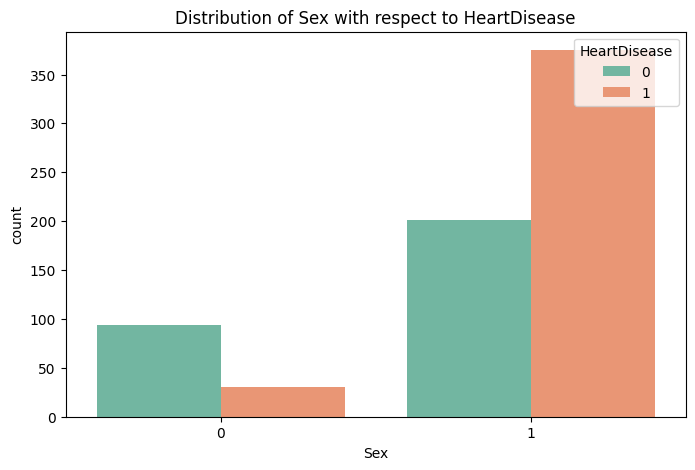

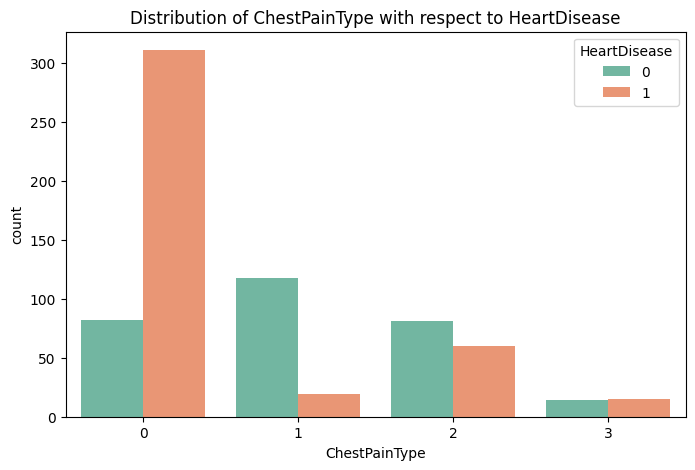

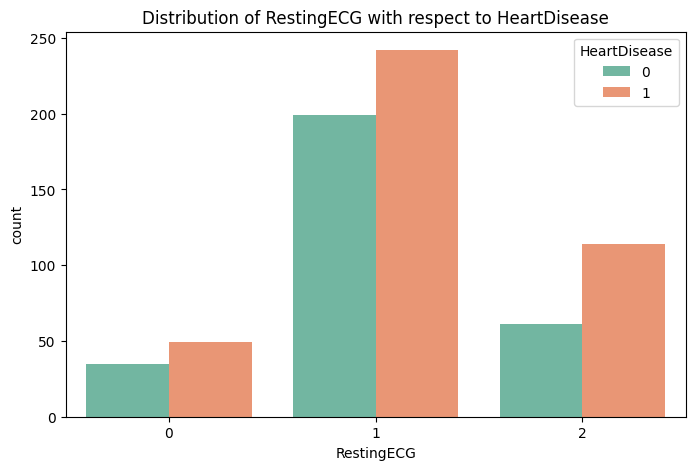

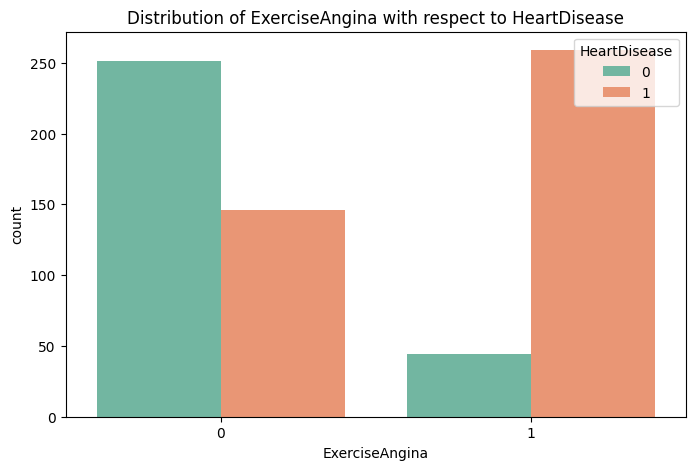

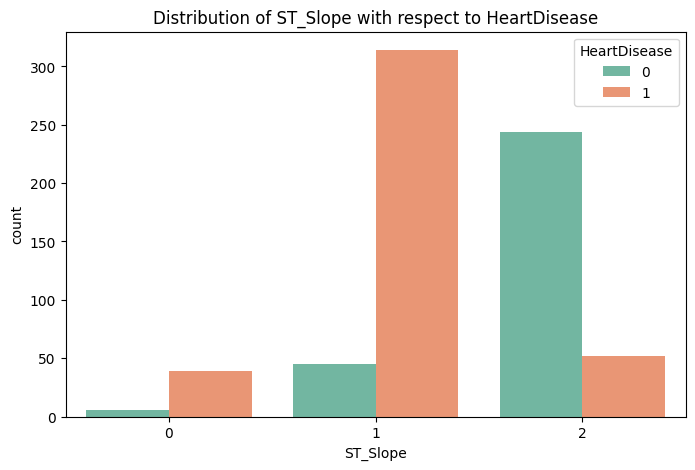

In [5]:
# Label encoding each categorical feature
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()
for feature in categorical_cols:
    data[feature] = le.fit_transform(data[feature])

data.head()

# Standardize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define EDA functions
def categorical_eda(data, categorical_cols, target_col='HeartDisease'):
    """Perform categorical EDA."""
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=data, hue=target_col, palette='Set2')
        plt.title(f"Distribution of {col} with respect to {target_col}")
        plt.legend(title=target_col, loc='upper right')
        plt.show()

categorical_eda(data, categorical_cols)

In [6]:
# Split data into independent/dependent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [8]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.79793321
Iteration 2, loss = 0.75314640
Iteration 3, loss = 0.72625559
Iteration 4, loss = 0.70290334
Iteration 5, loss = 0.67337001
Iteration 6, loss = 0.64640929
Iteration 7, loss = 0.61335378
Iteration 8, loss = 0.58124761
Iteration 9, loss = 0.55689746
Iteration 10, loss = 0.53944822
Iteration 11, loss = 0.52031489
Iteration 12, loss = 0.49601346
Iteration 13, loss = 0.46861730
Iteration 14, loss = 0.44191346
Iteration 15, loss = 0.42111998
Iteration 16, loss = 0.40386814
Iteration 17, loss = 0.38873567
Iteration 18, loss = 0.37691708
Iteration 19, loss = 0.36558890
Iteration 20, loss = 0.35494300
Iteration 21, loss = 0.34595213
Iteration 22, loss = 0.33703400
Iteration 23, loss = 0.32974934
Iteration 24, loss = 0.32209359
Iteration 25, loss = 0.31458406
Iteration 26, loss = 0.31038937
Iteration 27, loss = 0.30626504
Iteration 28, loss = 0.30017379
Iteration 29, loss = 0.29424506
Iteration 30, loss = 0.29106013
Iteration 31, loss = 0.28730507
Iteration 32, los

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

hidden_layer_sizes: it is a tuple where each element represents one layer and its value represents the number of neurons on each hidden layer.

learning_rate_init: It used to controls the step-size in updating the weights. 

activation: Activation function for the hidden layer. Examples, identity, logistic, tanh, and relu. by default, relu is used as an activation function.

random_state: It defines the random number for weights and bias initialization. 

verbose: It used to print progress messages to standard output.

In [9]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.88

classification rate of 88%